# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [243]:
# Load pickled data
import pickle
import random
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
# TODO: Fill this in based on where you saved the training and testing data

training_file = os.getcwd() + "/traffic-signs-data/train.p"
validation_file= os.getcwd() + "/traffic-signs-data/valid.p"
testing_file = os.getcwd() + "/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    


In [244]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#X_train, X_valid, y_train, y_valid = train_test_split(train['features'], train['labels'], test_size=0.30, random_state=42)

X_train_original = np.copy(X_train)
y_train_original = np.copy(y_train)
X_valid_original = np.copy(X_valid)
X_test_original = np.copy(X_test)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [245]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape[:2]

# How many unique classes/labels there are in the dataset.    
n_classes = max([len(set(y_train)), len(set(y_valid)), len(set(y_test))])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [246]:
import csv
def signsFromCSV():  
    with open('signnames.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        signs = {}
        for row in reader:
            classid = int(row['ClassId'])
            name = str(row['SignName'])
            signs[classid] = name
    return signs

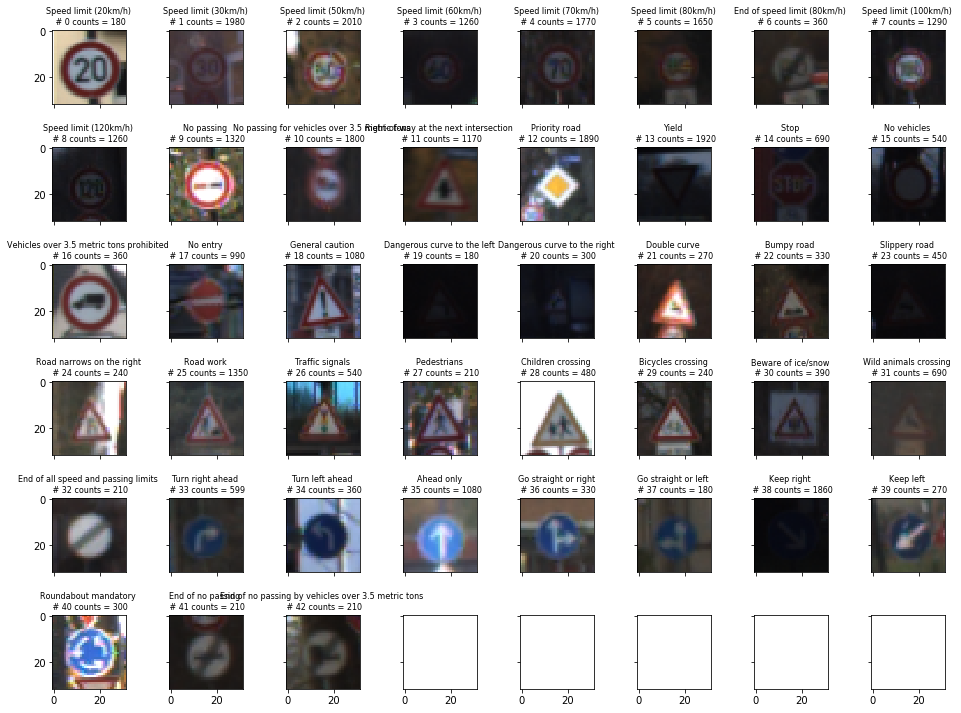

In [247]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# Visualizations will be shown in the notebook.
%matplotlib inline

# Explore the number of each sign in data.
sign_counts = {}
unique, counts = np.unique(y_train, return_counts=True)
sign_counts = dict(zip(unique, counts))

# get signs and class id from csv file
signs = signsFromCSV()

inx = np.zeros([43,])
for i in range(43):
    img = np.where(y_train == i)
    inx[i] = img[0][0]
    
fig = plt.figure(1, (16., 16.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 8),  # creates 6x8 grid of axes
                 axes_pad=.6,  # pad between axes in inch.
)
text = ""
for i, counts in sign_counts.items():
    image = X_train[int(inx[i])].squeeze()
    
    grid[i].imshow(image, cmap="gray")
    grid[i].set_title("%s \n # %s counts = %s" % (signs[i],i,counts), fontsize=8)


path = os.getcwd() + '/pics/'
plt.savefig(path + 'signs.png')
plt.show()

In [251]:
N_CLASSES = len(sign_counts)

def show_class_distribution(classIDs, title):
    plt.figure(figsize=(15, 5))
    plt.title('Class ID distribution for %s' % title)
    plt.hist(classIDs, bins=N_CLASSES)
    path = os.getcwd() + '/pics/'
    plt.savefig(path + 'distr.png')
    plt.show()
    

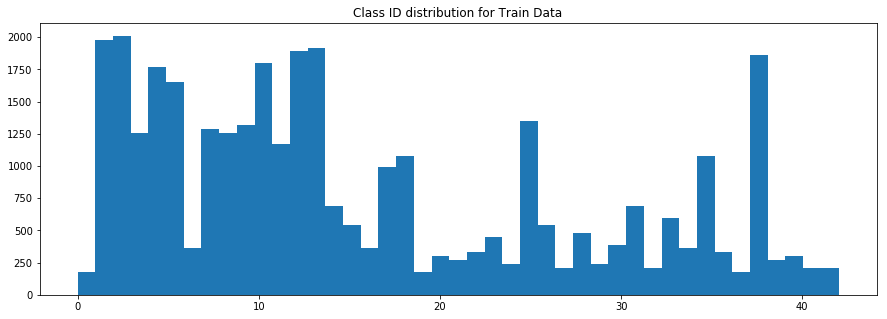

In [252]:
show_class_distribution(y_train, 'Train Data')

2
(32, 32, 3)


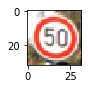

In [250]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
print(image.shape)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [253]:
import cv2
from sklearn.utils import shuffle


### Balanced Class Distribution of Training Data

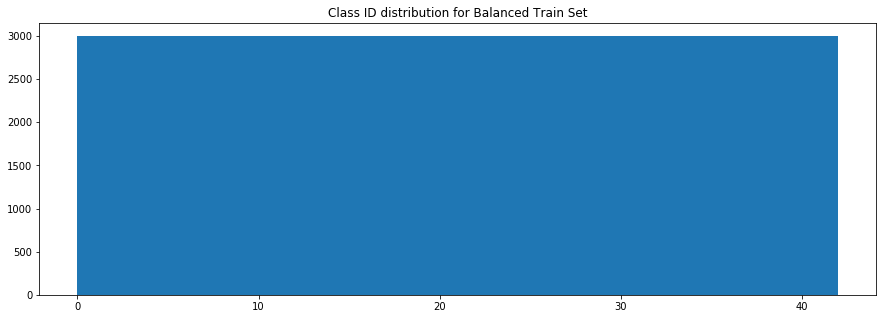

In [254]:
def balance_distribution(X, y, size):
    X_balanced = []
    y_balanced = []
    for c in range(N_CLASSES):
        data = X[y==c]
        indices = np.random.choice(sum(y==c), size)
        X_balanced.extend(X[y==c][indices])
        y_balanced.extend(y[y==c][indices])
    return np.array(X_balanced), np.array(y_balanced)

X_train, y_train = balance_distribution(X_train, y_train, 3000)
X_train_original, y_train_original = balance_distribution(X_train_original, y_train_original, 3000)

#X_valid, y_valid = balance_distribution(X_valid, y_valid, 500)

show_class_distribution(y_train, 'Balanced Train Set')

### Color normalization

In [11]:
import sklearn.preprocessing as prep
from sklearn.preprocessing import scale
#X = scale( X, axis=0, with_mean=True, with_std=True, copy=True )
#Grayscale and normalization of color values.
def normalize(features):

    norm = np.zeros((features.shape[0], features.shape[1], features.shape[2], 1), dtype=np.float32)

    # Slice out red, green, and blue values from all data.
    r = features[:,:,:,0]
    g = features[:,:,:,1]
    b = features[:,:,:,2]

    # Create gray values using the color value. 
    Y = (0.299*r + 0.587*g + 0.114*b)
    
    for i, item in enumerate(Y):
        Y[i] = prep.MinMaxScaler().fit_transform(item)
        
    copy = np.copy(features)
    copy = np.resize(copy,(features.shape[0], features.shape[1], features.shape[2], 1))

    norm[0,1,2] = copy[0,1,2]
    norm[:,:,:,0] = Y

    print('Grayscaled shape = ', norm.shape)
    print('Features have been grayscaled and normalized\n')
    return norm

In [12]:
# Call normalize function
print('Training data: ')
X_train = normalize(X_train)
print('Validation data: ')
X_valid = normalize(X_valid)
print('Test data: ')
X_test = normalize(X_test)



Training data: 
Grayscaled shape =  (129000, 32, 32, 1)
Features have been grayscaled and normalized

Validation data: 
Grayscaled shape =  (4410, 32, 32, 1)
Features have been grayscaled and normalized

Test data: 
Grayscaled shape =  (12630, 32, 32, 1)
Features have been grayscaled and normalized



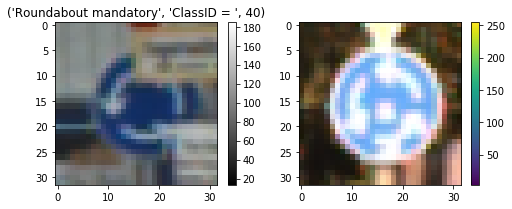

In [238]:
#Visualize normalization to verify effect on the images.
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(image, interpolation='none', cmap='gray')
plt.colorbar()
plt.title((signs[y_train[index]] , 'ClassID = ' , y_train[index]))

image = X_train_original[index].squeeze()
plt.subplot(122)
plt.imshow(image, interpolation='none')
plt.colorbar()

path = os.getcwd() + '/examples/'
plt.savefig(path + 'Grayscale_Example.png', bbox_inches='tight')

In [14]:
# shuffle data
X_train, y_train = shuffle(X_train, y_train)
#X_valid, y_valid = shuffle(X_valid, y_valid)

### Model Architecture

In [15]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 100

In [16]:
from tensorflow.contrib.layers import flatten

def LeNet(x, input_depth, n_classes):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, 24), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(24))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
      
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 480), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(480))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    #fc1drop = tf.nn.dropout(fc1, 0.8)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(480, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    fc2drop = tf.nn.dropout(fc2, 0.5)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits   = tf.matmul(fc2drop, fc3_W) + fc3_b
    
    return logits

In [17]:
#Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [18]:
# Training Pipeline
rate = 0.0005

logits = LeNet(x, 1, 43)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
# model training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print('Training Accuracy = {:.3f}'.format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.941
Validation Accuracy = 0.858

EPOCH 2 ...
Training Accuracy = 0.978
Validation Accuracy = 0.905

EPOCH 3 ...
Training Accuracy = 0.985
Validation Accuracy = 0.922

EPOCH 4 ...
Training Accuracy = 0.992
Validation Accuracy = 0.933

EPOCH 5 ...
Training Accuracy = 0.994
Validation Accuracy = 0.929

EPOCH 6 ...
Training Accuracy = 0.995
Validation Accuracy = 0.944

EPOCH 7 ...
Training Accuracy = 0.997
Validation Accuracy = 0.933

EPOCH 8 ...
Training Accuracy = 0.998
Validation Accuracy = 0.952

EPOCH 9 ...
Training Accuracy = 0.997
Validation Accuracy = 0.949

EPOCH 10 ...
Training Accuracy = 0.998
Validation Accuracy = 0.944

EPOCH 11 ...
Training Accuracy = 0.998
Validation Accuracy = 0.949

EPOCH 12 ...
Training Accuracy = 0.999
Validation Accuracy = 0.955

EPOCH 13 ...
Training Accuracy = 0.999
Validation Accuracy = 0.949

EPOCH 14 ...
Training Accuracy = 0.999
Validation Accuracy = 0.951

EPOCH 15 ...
Training Accuracy = 0.999
Valid

In [29]:
# Test set accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.944


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [30]:
path = os.getcwd() + '/my-traffic-signs/'
files = os.listdir(path) # list of image file names
try:
    files.remove('.DS_Store') #remove .DS_Store file from list of images
except ValueError:
    pass
print(files)

['sign36.jpg', 'sign1.jpg', 'sign33.jpg', 'sign12.jpg', 'sign25.jpg']


In [31]:
#Initialize the internet images test array.
X_new = np.zeros([5, 32, 32, 3], dtype=np.uint8)

print('Import path = ', path + files[0])

for i, file in enumerate(files):
    
    img = cv2.imread(path + file, cv2.IMREAD_COLOR)
    
    #Swapping red and blue channels for proper output.
    red = img[:,:,2].copy()
    blue = img[:,:,0].copy()
    img[:,:,0] = red
    img[:,:,2] = blue
    
    # Assign imported image into the internet images test array.
    X_new[i] = img

    print('Image imported = ', file)
    print('Shape is ', X_new[i].shape)
  
print('X_internet shape = ',X_new.shape)
X_new_org = np.copy(X_new)
print('Original shape = ', X_new_org.shape)
    

Import path =  /home/ubuntu/pynb/udacity/CarND-Traffic-Sign-Classifier-Project/my-traffic-signs/sign36.jpg
Image imported =  sign36.jpg
Shape is  (32, 32, 3)
Image imported =  sign1.jpg
Shape is  (32, 32, 3)
Image imported =  sign33.jpg
Shape is  (32, 32, 3)
Image imported =  sign12.jpg
Shape is  (32, 32, 3)
Image imported =  sign25.jpg
Shape is  (32, 32, 3)
X_internet shape =  (5, 32, 32, 3)
Original shape =  (5, 32, 32, 3)


In [32]:
X_new = normalize(X_new)


Grayscaled shape =  (5, 32, 32, 1)
Features have been grayscaled and normalized



### Predict the Sign Type for Each Image

In [37]:
keep_prob = tf.placeholder(tf.float32, name='keep_prob') # probability to keep units
y_new = np.array([36,1,33,12,25])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    prediction=tf.argmax(logits,1)
    predictions = prediction.eval(feed_dict={x: X_new, keep_prob: 1}, session=sess)
    print("Predictions = ", predictions)

for i, pred in enumerate(predictions):
    
    print('\nPrediction = ', signs[pred], ' \nActual Sign = ',signs[y_new[i]])

Predictions =  [36  1 33 12 25]

Prediction =  Go straight or right  
Actual Sign =  Go straight or right

Prediction =  Speed limit (30km/h)  
Actual Sign =  Speed limit (30km/h)

Prediction =  Turn right ahead  
Actual Sign =  Turn right ahead

Prediction =  Priority road  
Actual Sign =  Priority road

Prediction =  Road work  
Actual Sign =  Road work


### Analyze Performance

In [41]:
def evaluate_internet(X_data, y_data):
    sess = tf.get_default_session()
    
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data, keep_prob: 1})
    return accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate_internet(X_new, y_new)
    print("Internet Accuracy = {:.3f}".format(test_accuracy))

Internet Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [39]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

# Calculate top 5 soft max probabilities for internet images
softmax = tf.nn.softmax(logits=logits, name='softmax')
top5_softmaxes = tf.nn.top_k(softmax, k=5)
 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Get softmax top 5 for each image
    for i in range(5):
        xint = np.zeros([1,32,32,1])
        xint[0] = X_new[i]

        top5 = sess.run(top5_softmaxes, feed_dict={x: xint, y: y_new, keep_prob: 1})
        
        prob = top5[0].reshape([5]) # Array of probabilities
        classes = top5[1].reshape([5]) # Array of ClassIDs
        
        # Traffic sign name
        print("\nTest sign: %s \n" % signs[y_new[i]])
        
        for i, p in enumerate(prob):
            print('%s - smax:%.3f' % (signs[classes[i]], p))



Test sign: Go straight or right 

Speed limit (80km/h) - smax:0.540
Go straight or right - smax:0.454
Speed limit (60km/h) - smax:0.002
Speed limit (100km/h) - smax:0.002
Yield - smax:0.001

Test sign: Speed limit (30km/h) 

Speed limit (30km/h) - smax:0.980
Speed limit (20km/h) - smax:0.017
Speed limit (120km/h) - smax:0.002
Bicycles crossing - smax:0.000
End of speed limit (80km/h) - smax:0.000

Test sign: Turn right ahead 

Turn right ahead - smax:1.000
Ahead only - smax:0.000
Speed limit (20km/h) - smax:0.000
Speed limit (30km/h) - smax:0.000
Speed limit (50km/h) - smax:0.000

Test sign: Priority road 

Priority road - smax:1.000
Traffic signals - smax:0.000
Pedestrians - smax:0.000
Speed limit (20km/h) - smax:0.000
Speed limit (30km/h) - smax:0.000

Test sign: Road work 

Road work - smax:1.000
Dangerous curve to the right - smax:0.000
Keep right - smax:0.000
Speed limit (50km/h) - smax:0.000
Slippery road - smax:0.000


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [255]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
 
    activation = tf_activation.eval(session=sess, feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
    plt.savefig(path + '/pics/activation{}.png'.format(plt_num), bbox_inches='tight')

In [257]:
# Very frustrated that I couldn't get this to work. I spent hours on slack, forums, etc. 
# Please explain why this doesn't work.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

#Visualize activations
    xint = np.asarray(X_new[3:4])
    for i in range(1,5):
        act = sess.graph.get_tensor_by_name("act{}:0".format(i))
        outputFeatureMap(xint, act, plt_num=i)

NotFoundError: Key Variable_12/Adam_1 not found in checkpoint
	 [[Node: save/RestoreV2_10 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_10/tensor_names, save/RestoreV2_10/shape_and_slices)]]

Caused by op 'save/RestoreV2_10', defined at:
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-ffa37b2e82d6>", line 4, in <module>
    saver = tf.train.Saver()
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 361, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 200, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 441, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/eugennekhai/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key Variable_12/Adam_1 not found in checkpoint
	 [[Node: save/RestoreV2_10 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_10/tensor_names, save/RestoreV2_10/shape_and_slices)]]
